# 環境構築


*   Pythonモジュールへのパス追加


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import sys
sys.path.append('/home/i9-10920x/ML/modules')

In [3]:
# !pip install keras-tuner --upgrade

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
import show_mod

# 前処理

In [7]:
#読み込むデータのパスの設定

data_path = '/home/i9-10920x/ML/MLTrial/data'
input_list = glob.glob(data_path+"/*"+"/inputdata.csv")


In [9]:
#input(空調条件等)の読み込み
df_input = None

for input_fname in input_list:
    df_read = pd.read_csv(input_fname, index_col="case_name")
    if df_input is None:
        df_input = df_read
    else:
        df_input = pd.concat([df_input, df_read])

df_input

,aircon,ventilation,exhaust,1_x,1_y,1_z,1_angle,2_x,2_y,2_z,...,4_z,4_angle,5_x,5_y,5_z,5_angle,office_size_x,office_size_y,aircon_position_x,aircon_position_y
case_name,,,,,,,,,,,,,,,,,,,,,
office2_960_164_aout,960,164,a,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_82_bout,960,82,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_960_246_bout,960,246,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_660_164_bout,660,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
office2_0_164_bout,0,164,b,3.780,1.265,1.255,90.0,4.76,2.74,1.255,...,1.255,0.0,2.84,3.14,1.255,0.0,6.0,5.5,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
office28_960_82_bout,960,82,b,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_660_0,660,0,off,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00
office28_360_246_aout,360,246,a,1.265,3.820,1.255,0.0,2.93,2.84,1.255,...,1.255,270.0,2.97,4.76,1.255,270.0,9.5,6.0,4.75,3.00


In [15]:
#空調条件のみ抽出
df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

df_meta

,aircon,ventilation,exhaust
case_name,,,
office2_960_164_aout,960,164,a
office2_960_82_bout,960,82,b
office2_960_246_bout,960,246,b
office2_660_164_bout,660,164,b
office2_0_164_bout,0,164,b
...,...,...,...
office28_960_82_bout,960,82,b
office28_660_0,660,0,off
office28_360_246_aout,360,246,a


In [16]:
#排気口位置a,b,offをダミー変数化

df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# dummies = pd.get_dummies(df_input['exhaust'])
# df_input.drop("exhaust", axis=1, inplace=True)
# df_input = pd.concat([df_input, dummies], axis=1)
# df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
#           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
#           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
#           ,"aircon_position_x","aircon_position_y"])

df_meta

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,960,164,1,0,0
office2_960_82_bout,960,82,0,1,0
office2_960_246_bout,960,246,0,1,0
office2_660_164_bout,660,164,0,1,0
office2_0_164_bout,0,164,0,1,0
...,...,...,...,...,...
office28_960_82_bout,960,82,0,1,0
office28_660_0,660,0,0,0,1
office28_360_246_aout,360,246,1,0,0


In [17]:
#入力データフレームのインデックス順に、感染リスク分布ファイルを読み込むためのパスリスト作成
case_index_list = list(df_meta.index)

path2data = '/home/i9-10920x/ML/MLTrial/data'

distribution_path_list = []
for case_index in case_index_list:
    str_list = case_index.split('_', maxsplit=1)
    distribution_path_list.append(path2data + '/' + str_list[0] + '/data/' + str_list[1] + '/risk_dist.csv')

# distribution_path_list

In [295]:
#高さと幅の最大値の取得

max_height = 0
max_width = 0
for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    max_height = max(max_height, array_read.shape[0])
    max_width = max(max_width, array_read.shape[1])

print(max_height, max_width)

65 95


In [296]:
#−１パディングでサイズ合わせ
distributionArray_list = []

for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    array_padded = np.pad(array=array_read, pad_width=[(0, max_height - array_read.shape[0]), (0,  max_width - array_read.shape[1])],\
                        mode="constant", constant_values = (-1) )
    distributionArray_list.append(array_padded)

distributionArray_padded = np.array(distributionArray_list)
distributionArray_padded.shape

(263, 65, 95)

In [147]:
#感染リスク分布を読み込んで平均値をそのケースのリスクとする

risk_mean_list = []

for file_path in distribution_path_list:
    array_read = np.loadtxt(file_path, delimiter=",", dtype=np.float32)
    risk_mean_list.append(array_read.mean())

risk_mean_array = np.array(risk_mean_list)
risk_mean_array.shape

(263,)

In [307]:
case_index_with_meanOfRisk = []

for i, case_index in enumerate(case_index_list):
    case_index_with_meanOfRisk.append(case_index + ', {:.2%}'.format(risk_mean_array[i]))
    
case_index_with_meanOfRisk

['office2_960_164_aout, 6.14%',
 'office2_960_82_bout, 6.63%',
 'office2_960_246_bout, 8.85%',
 'office2_660_164_bout, 6.05%',
 'office2_0_164_bout, 4.98%',
 'office2_0_82_aout, 5.61%',
 'office2_960_82_aout, 6.50%',
 'office2_0_246_bout, 6.03%',
 'office2_0_0, 5.17%',
 'office2_0_82_bout, 5.37%',
 'office2_660_246_bout, 5.22%',
 'office2_0_246_aout, 5.25%',
 'office2_660_164_aout, 6.73%',
 'office2_360_82_aout, 4.16%',
 'office2_660_246_aout, 6.73%',
 'office2_660_82_bout, 5.57%',
 'office2_360_164_aout, 4.84%',
 'office2_360_0, 4.93%',
 'office2_960_0, 6.60%',
 'office2_660_82_aout, 5.84%',
 'office2_0_164_aout, 5.37%',
 'office2_360_246_bout, 6.08%',
 'office2_960_246_aout, 8.65%',
 'office2_960_164_bout, 7.32%',
 'office2_360_246_aout, 4.22%',
 'office2_360_164_bout, 5.49%',
 'office2_660_0, 5.82%',
 'office2_360_82_bout, 4.27%',
 'office7_360_164_bout, 6.27%',
 'office7_660_246_aout, 7.67%',
 'office7_660_82_bout, 6.44%',
 'office7_660_82_aout, 6.59%',
 'office7_660_164_bout, 7.39

office7_960_246_bout, 9.15%


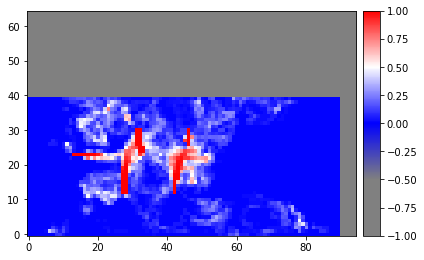

office22_360_82_bout, 2.09%


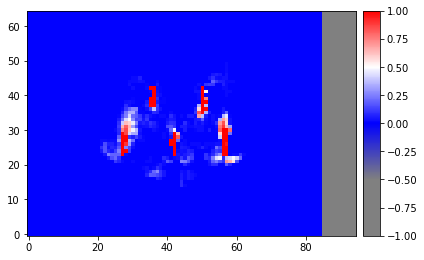

In [396]:
ID_max = risk_mean_array.argmax()
ID_min = risk_mean_array.argmin()

print(case_index_with_meanOfRisk[ID_max])
show_mod.show_image(distributionArray_padded[ID_max], cbar=True, cmap=cmap)

print('=======================================================')

print(case_index_with_meanOfRisk[ID_min])
show_mod.show_image(distributionArray_padded[ID_min], cbar=True, cmap=cmap)

In [317]:
arg = np.argsort(risk_mean_array)
median_ID = arg[len(arg)//2]

print(case_index_with_meanOfRisk[median_ID])

office10_960_246_aout, 4.56%


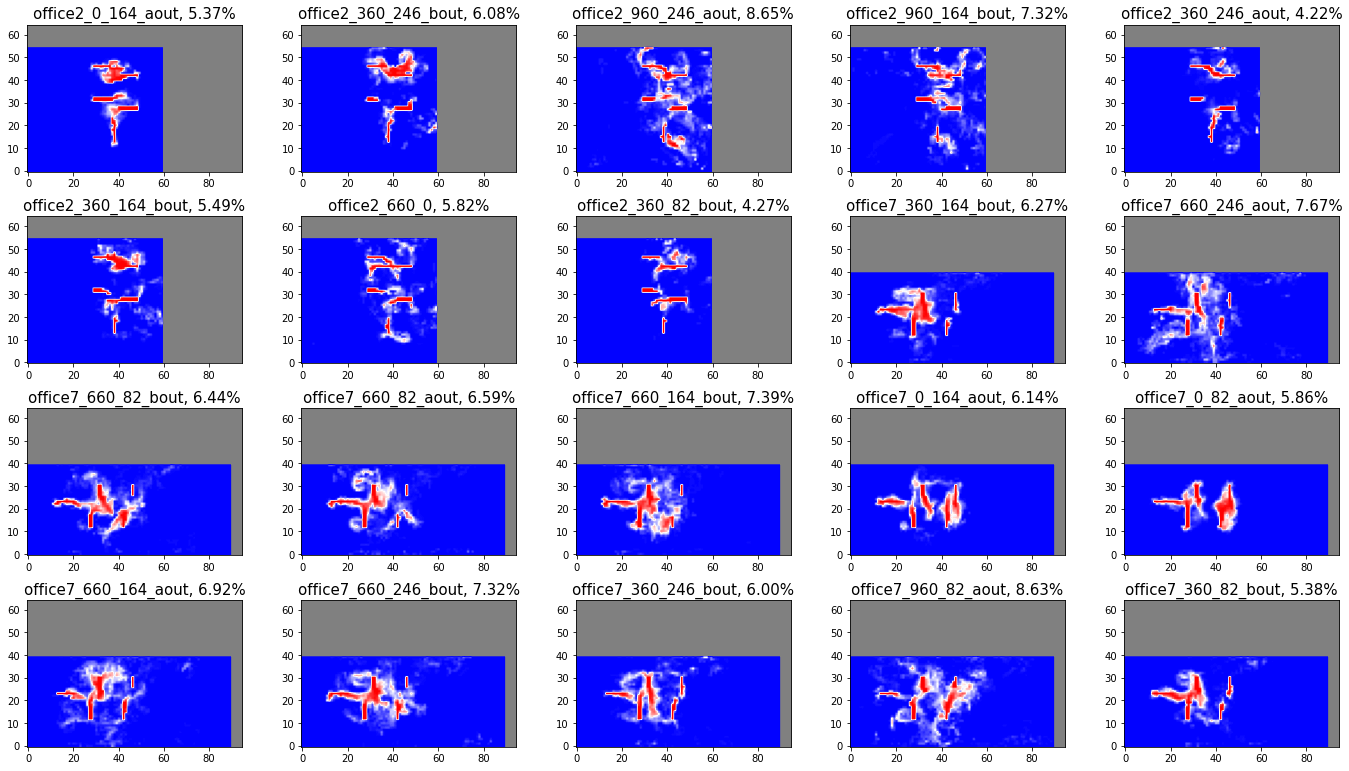

In [400]:
#複数プロット
offset = 20
show_mod.show_images(
    distributionArray_padded[offset:],
    title_name=case_index_with_meanOfRisk[offset:],
    row=4, column=5, cbar=False, cmap=cmap
)

In [148]:
# np_output = np.empty((max_num_row, max_num_column))
# for i in range(num_output):
#     np_temp = np.loadtxt(output_list[i], delimiter=",", dtype=np.float32)
    
#     if np_temp.shape[0] < max_num_row :
#         nan = np.empty((max_num_row - int(np_temp.shape[0]), max_num_column))
#         nan[max_num_row - int(np_temp.shape[0]), max_num_column] = np.nan
#         np.insert(np_temp, int(np_temp.shape[0]) + 1 : max_num_row, :] = np.nan
#     if np_temp.shape[1] < max_num_column :
#         np_temp[:, int(np_temp.shape[1]) + 1:] = np.nan 
    
#     np_output = np.append(np_output, np_temp, axis=0)
    
# output = []
# for i in range(num_output):
#     with open (output_list[i], "r") as csv_fname:
#         reader = csv.reader(csv_fname)
#         temp_list = [row for row in reader]
#         output.append(temp_list)

In [149]:
# np_output_2D = df_output_2D.to_numpy()
# np_output_3D = np_output_2D.reshape(office_list.shape[0], max_num_row, max_num_column)

In [150]:
# np_output_3D.shape

In [151]:
# plt.imshow(np_output_3D[0], cmap="bwr", origin="lower")

In [152]:
from sklearn import preprocessing

#入力データの標準化
stdscaler = preprocessing.StandardScaler()
stdscaler.fit(df_meta)
df_meta_tf = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_tf, index=df_meta.index, columns=df_meta.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_960_164_aout,1.261546,0.294952,1.143249,-0.874700,-0.391802
office2_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office2_960_246_bout,1.261546,1.276880,-0.874700,1.143249,-0.391802
office2_660_164_bout,0.435795,0.294952,-0.874700,1.143249,-0.391802
office2_0_164_bout,-1.380856,0.294952,-0.874700,1.143249,-0.391802
...,...,...,...,...,...
office28_960_82_bout,1.261546,-0.686976,-0.874700,1.143249,-0.391802
office28_660_0,0.435795,-1.668904,-0.874700,-0.874700,2.552310
office28_360_246_aout,-0.389955,1.276880,1.143249,-0.874700,-0.391802


In [194]:
stdscaler_risk = preprocessing.StandardScaler()

risk_mean_array_2d = risk_mean_array.reshape(-1,1)
stdscaler.fit(risk_mean_array_2d)
risk_mean_standardized = stdscaler.transform(risk_mean_array_2d)

risk_mean_standardized

array([[ 0.9345412 ],
       [ 1.2850636 ],
       [ 2.862018  ],
       [ 0.86967397],
       [ 0.11055076],
       [ 0.5610365 ],
       [ 1.1942706 ],
       [ 0.85717595],
       [ 0.24909812],
       [ 0.39123523],
       [ 0.285279  ],
       [ 0.30451414],
       [ 1.3531778 ],
       [-0.4741317 ],
       [ 1.358757  ],
       [ 0.534159  ],
       [ 0.01228911],
       [ 0.07505318],
       [ 1.2663293 ],
       [ 0.7212473 ],
       [ 0.38598612],
       [ 0.89376587],
       [ 2.7209587 ],
       [ 1.7743342 ],
       [-0.42763245],
       [ 0.47296607],
       [ 0.70791143],
       [-0.39276862],
       [ 1.0263467 ],
       [ 2.0259984 ],
       [ 1.1496191 ],
       [ 1.2559699 ],
       [ 1.8239795 ],
       [ 0.935982  ],
       [ 0.7353287 ],
       [ 1.4926533 ],
       [ 1.7769964 ],
       [ 0.8357208 ],
       [ 2.7070622 ],
       [ 0.3997305 ],
       [ 0.866603  ],
       [ 0.6137162 ],
       [ 2.4923546 ],
       [ 0.82104486],
       [ 0.15278648],
       [ 0

In [367]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    # body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。
"""
officemodel_path = '/home/i9-10920x/ML/officemodel'
# office_list = os.listdir(officemodel_path)
case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
print(office_list)

# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

sampledPointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        

    pc_aircon = pc_dict[OfficePart.aircon]
    pc_airvent = pc_dict[OfficePart.airvent]
    pc_room = pc_dict[OfficePart.room]
    pc_base = np.concatenate([pc_aircon, pc_airvent, pc_room])
    num_sampling = NUM_POINTS - len(pc_base)

    # pc_forSampling = np.concatenate([pc_dict[OfficePart.body], pc_dict[OfficePart.desks]])
    pc_forSampling = pc_dict[OfficePart.desks]
    print(f'#sampling {num_sampling} from {len(pc_forSampling)}', )
    rand_list = random.sample(range(len(pc_forSampling)), k=num_sampling)
    pc_sampled = pc_forSampling[rand_list, :]
    
    pointCloud = np.concatenate([pc_base, pc_sampled])
    print(pointCloud.shape)
    sampledPointCloud_dict[officename] = pointCloud


['case10', 'case28', 'case7', 'case19', 'case2', 'case15', 'case12', 'case9', 'case30', 'case22', 'case5', 'case27', 'case31', 'case24', 'case29', 'case3', 'case6', 'case26', 'case1', 'case25', 'case14', 'case11', 'case32', 'case23', 'case21', 'case33', 'case4', 'case13', 'case8', 'case20', 'case17', 'case18', 'case16']
OfficePart.aircon
OfficePart.airvent
OfficePart.room
OfficePart.desks
['/home/i9-10920x/ML/officemodel/case2/aircon/aircon_inlets.stl', '/home/i9-10920x/ML/officemodel/case2/aircon/aircon_body.stl', '/home/i9-10920x/ML/officemodel/case2/aircon/aircon_outlet.stl']
['/home/i9-10920x/ML/officemodel/case2/airvent/airvent_b.stl', '/home/i9-10920x/ML/officemodel/case2/airvent/20210812_airvent_a.stl']
['/home/i9-10920x/ML/officemodel/case2/room/20210810_office_side3.stl', '/home/i9-10920x/ML/officemodel/case2/room/20210810_office_bottom.stl', '/home/i9-10920x/ML/officemodel/case2/room/20210812_office_side4.stl', '/home/i9-10920x/ML/officemodel/case2/room/20210810_office_side1.

In [368]:
# import os
# import glob
# import shutil


# officemodel_path = '/home/i9-10920x/ML/officemodel'
# case_list = os.listdir(officemodel_path)
# print(office_list)

    
# # NUM_POINTS = 2048

# # sampledPointCloud_dict = {}
# for casename in case_list:
#     path = officemodel_path + '/' + casename
#     # if os.path.exists(path + '/room'):
#     #     os.rmdir(path + '/room')
#     stl_desks_path = glob.glob(path + "/room_and_desks/*desks*")
#     # print(stl_desks_path)
#     os.makedirs(path + '/desks')
#     shutil.move(stl_desks_path[0], path + '/desks')
    
#     os.rename(path + "/room_and_desks", path + "/room") 
# #         path = officemodel_path + '/' + casename + '/' + part.name
# #         stl_list = glob.glob(path + "/*.stl")


In [369]:
# mesh_read = mesh.Mesh.from_file('officemodel/case2/body/20210812_bodies_case2.stl')
# points = mesh_read.points.reshape([-1, 3])
# print(points.shape)

# for mesh_read in mesh.Mesh.from_multi_file('officemodel/case2/body/20210812_bodies_case2.stl'):
#     points = mesh_read.points.reshape([-1, 3])
#     print(points.shape)
    
# for mesh_read in mesh.Mesh.from_multi_file('officemodel/case2/airvent/20210812_airvent_a.stl'):
#     points = mesh_read.points.reshape([-1, 3])
#     print(points.shape)

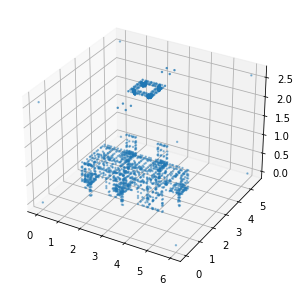

In [370]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(sampledPointCloud_dict['office1'])

In [371]:
import numpy as np
'''
点群シャッフルによるデータ増強
'''
rng = np.random.default_rng()

pointCloud_augumented_dict = {}
for office_name, pointCloud in sampledPointCloud_dict.items():
    pc_list = []
    for i in range(4):
        pc = pointCloud.copy()

        if i >= 1:
            #点群のシャッフル
            rng.shuffle(pc)

        pc_list.append(pc)

    pointCloud_augumented_dict[office_name] = pc_list

pointCloud_augumented_dict

{'office2': [array([[2.5     , 2.25    , 2.6     ],
         [2.5     , 2.375   , 2.6     ],
         [2.5     , 2.45    , 2.6     ],
         ...,
         [3.745   , 1.175   , 0.48    ],
         [2.878333, 4.81    , 0.53    ],
         [3.98    , 1.178   , 0.53    ]], dtype=float32),
  array([[3.825   , 4.7     , 0.7     ],
         [3.075   , 3.027778, 0.75    ],
         [3.775   , 3.65    , 0.61    ],
         ...,
         [3.7     , 0.99    , 0.48    ],
         [4.233333, 1.766667, 0.7     ],
         [3.125   , 5.05    , 0.2125  ]], dtype=float32),
  array([[2.7      , 2.3497   , 2.566467 ],
         [4.258333 , 3.45     , 0.05     ],
         [4.475    , 3.75     , 0.2125   ],
         ...,
         [4.475    , 5.1      , 0.5166667],
         [2.7      , 3.1503   , 2.6      ],
         [5.035    , 2.855    , 0.53     ]], dtype=float32),
  array([[3.075   , 2.483333, 0.7     ],
         [3.98    , 1.084   , 0.48    ],
         [3.775   , 3.183333, 0.75    ],
         ...,
   

In [372]:
'''
点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
'''
case_index_augumented_list = []

pointCloudArray_list = []
metaArray_list = []

riskArray_list = []

for ID, case_index in enumerate(case_index_list):
    office_name = case_index.split('_', maxsplit=1)[0]
    pc_list = pointCloud_augumented_dict[office_name]
    for augumentID, pointCloud in enumerate(pc_list):
        case_index_augumented_list.append(case_index + '-' + str(augumentID))
        pointCloudArray_list.append(pointCloud)
        metaArray_list.append(df_meta_standardized.loc[case_index])
        riskArray_list.append(risk_mean_standardized[ID])

case_index_array = np.array(case_index_augumented_list)
pointCloudArray = np.array(pointCloudArray_list)
metaArray = np.array(metaArray_list)
riskArray = np.array(riskArray_list)


In [373]:
print(case_index_array)

print(pointCloudArray)
print(metaArray)

print(riskArray)

['office2_960_164_aout-0' 'office2_960_164_aout-1'
 'office2_960_164_aout-2' ... 'office28_960_246_bout-1'
 'office28_960_246_bout-2' 'office28_960_246_bout-3']
[[[2.5       2.25      2.6      ]
  [2.5       2.375     2.6      ]
  [2.5       2.45      2.6      ]
  ...
  [3.745     1.175     0.48     ]
  [2.878333  4.81      0.53     ]
  [3.98      1.178     0.53     ]]

 [[3.825     4.7       0.7      ]
  [3.075     3.027778  0.75     ]
  [3.775     3.65      0.61     ]
  ...
  [3.7       0.99      0.48     ]
  [4.233333  1.766667  0.7      ]
  [3.125     5.05      0.2125   ]]

 [[2.7       2.3497    2.566467 ]
  [4.258333  3.45      0.05     ]
  [4.475     3.75      0.2125   ]
  ...
  [4.475     5.1       0.5166667]
  [2.7       3.1503    2.6      ]
  [5.035     2.855     0.53     ]]

 ...

 [[2.716667  3.825     0.7      ]
  [4.55      3.1       2.6      ]
  [5.15      2.94      2.6      ]
  ...
  [2.95      3.308333  0.75     ]
  [4.37      2.565     0.96     ]
  [3.9125    3.125   

In [374]:
'''
特定のofficeだけ、テスト用にとっておく。
学習にも、チューニング中の検証にも使わない。
'''

office_for_test = 'office10'
fit_ID = []
test_ID = []

for (ID, case_index) in enumerate(case_index_augumented_list):
    if office_for_test + '_' not in case_index:
        fit_ID.append(ID)
    else:
        test_ID.append(ID)

print(case_index_array[test_ID])
        
case_index_fit = case_index_array[fit_ID]
X_pc_fit = pointCloudArray[fit_ID]
X_meta_fit = metaArray[fit_ID]
y_fit = riskArray[fit_ID]

case_index_test = case_index_array[test_ID]
X_pc_test = pointCloudArray[test_ID]
X_meta_test = metaArray[test_ID]
y_test = riskArray[test_ID]

['office10_360_164_bout-0' 'office10_360_164_bout-1'
 'office10_360_164_bout-2' 'office10_360_164_bout-3'
 'office10_660_246_aout-0' 'office10_660_246_aout-1'
 'office10_660_246_aout-2' 'office10_660_246_aout-3'
 'office10_660_82_bout-0' 'office10_660_82_bout-1'
 'office10_660_82_bout-2' 'office10_660_82_bout-3'
 'office10_660_82_aout-0' 'office10_660_82_aout-1'
 'office10_660_82_aout-2' 'office10_660_82_aout-3'
 'office10_660_164_bout-0' 'office10_660_164_bout-1'
 'office10_660_164_bout-2' 'office10_660_164_bout-3'
 'office10_0_164_aout-0' 'office10_0_164_aout-1' 'office10_0_164_aout-2'
 'office10_0_164_aout-3' 'office10_0_82_aout-0' 'office10_0_82_aout-1'
 'office10_0_82_aout-2' 'office10_0_82_aout-3' 'office10_660_164_aout-0'
 'office10_660_164_aout-1' 'office10_660_164_aout-2'
 'office10_660_164_aout-3' 'office10_660_246_bout-0'
 'office10_660_246_bout-1' 'office10_660_246_bout-2'
 'office10_660_246_bout-3' 'office10_360_246_bout-0'
 'office10_360_246_bout-1' 'office10_360_246_bout

In [375]:
from k_cross_split import get_k_cross_ID_list

'''
チューニングに使うデータを，学習用と検証用に分ける
'''

data_size = len(X_pc_fit)
k = 4
print('data_size =', data_size)
print('k =', k)

#k分割交差検証用の関数だが、ここでは単に訓練データと検証データの分割目的で使う
k_cross_ID_list = get_k_cross_ID_list(data_size, k)

(train_ID, val_ID) = k_cross_ID_list[0]
print(train_ID)
print(val_ID)

X_pc_train = X_pc_fit[train_ID]
X_meta_train = X_meta_fit[train_ID]
y_train = y_fit[train_ID]

X_pc_val = X_pc_fit[val_ID]
X_meta_val = X_meta_fit[val_ID]
y_val = y_fit[val_ID]

data_size = 940
k = 4
[4, 768, 601, 188, 893, 226, 490, 450, 244, 785, 811, 75, 894, 636, 473, 340, 28, 455, 284, 153, 810, 224, 287, 897, 414, 702, 371, 143, 772, 51, 186, 710, 610, 69, 797, 262, 86, 11, 432, 263, 871, 540, 358, 826, 155, 482, 676, 693, 201, 116, 850, 309, 167, 285, 273, 935, 842, 146, 71, 603, 173, 776, 239, 755, 795, 40, 854, 726, 370, 227, 429, 326, 885, 891, 443, 377, 879, 925, 567, 454, 530, 369, 461, 293, 250, 930, 292, 225, 678, 586, 136, 698, 132, 845, 355, 626, 41, 97, 539, 605, 164, 241, 682, 647, 122, 910, 172, 67, 596, 181, 385, 246, 709, 691, 609, 364, 779, 525, 724, 299, 697, 413, 487, 624, 89, 800, 238, 840, 538, 884, 844, 535, 495, 444, 72, 621, 860, 672, 289, 500, 486, 147, 343, 488, 283, 76, 901, 368, 882, 363, 690, 247, 807, 399, 353, 275, 334, 474, 376, 841, 210, 707, 195, 264, 723, 301, 349, 276, 321, 604, 921, 8, 563, 85, 193, 600, 267, 386, 877, 716, 507, 861, 533, 183, 65, 451, 818, 667, 203, 156, 506, 514, 50, 374, 689, 665, 271, 419, 759, 862

In [376]:
case_index_train = case_index_fit[train_ID]
case_index_val = case_index_fit[val_ID]

# モデル実装

In [377]:
import IPython
import keras_tuner as kt

In [378]:
from tensorflow import keras
from PointNet import conv_bn, dense_bn


def permutation_invariant_network_builder(hp, inputs):
    """
    順序不変性（PointNetからtnetを除去したもの）モデルビルダー関数

    ハイパーパラメータを引数にとる（チューニング用）
    """

    x = inputs
    
    hp_conv_bn_layers = hp.Int('conv_bn_layers', min_value = 1, max_value = 4, step = 1)
    for i in range(hp_conv_bn_layers):
        hp_filters_bn = hp.Int(f'filters_bn-{i}', min_value = 32, max_value = 512, step = 32)
        x = conv_bn(x, hp_filters_bn)
    
    x = keras.layers.GlobalMaxPooling1D()(x)
    
    # Tune the dropout rate for the optimizer 
    hp_dropout_rate = hp.Choice('dropout_rate', values = [0.3, 0.5, 0.9])
    
    hp_dense_bn_layers = hp.Int('dense_bn_layers', min_value = 0, max_value = 4, step = 1)
    for i in range(hp_dense_bn_layers):
        hp_units_bn = hp.Int(f'units_bn_{i}', min_value = 32, max_value = 512, step = 32)
        x = dense_bn(x, hp_units_bn)
        x = keras.layers.Dropout(hp_dropout_rate)(x)

    hp_features = hp.Int('features', min_value = 4, max_value = 64, step = 4)
    features = keras.layers.Dense(hp_features, activation="relu")(x)

    return features


In [379]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from keras.layers.convolutional import Conv2DTranspose, Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from keras.layers import LeakyReLU

In [380]:
#確認用コード
# inputs = keras.Input(shape=(metaArray.shape[1], ), name='meta')
# outputs = generator_builder(inputs)
# model = keras.Model(inputs=inputs, outputs=outputs, name="test")
# keras.utils.plot_model(model, show_shapes=True)

In [381]:
NUM_POINTS = pointCloudArray.shape[1]

def total_model_builder(hp):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、
    転置畳み込みで感染リスク分布を出力する。

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    input_pointCloud = keras.Input(shape=(NUM_POINTS, 3), name='pointCloud')
    input_meta = keras.Input(shape=(metaArray.shape[1], ), name='meta')

    features_pc = permutation_invariant_network_builder(hp, input_pointCloud)
    
    features = keras.layers.Concatenate()([features_pc, input_meta])
    
    x = features
    
    hp_dense_layers = hp.Int('dense_layers', min_value = 0, max_value = 8, step = 1)
    for i in range(hp_dense_layers):
        hp_units = hp.Int(f'units-{i}', min_value = 32, max_value = 512, step = 32)
        x = keras.layers.Dense(hp_units, activation="relu")(x)
    
    outputs = keras.layers.Dense(1)(x)
#     hp_activation = hp.Int('activation', min_value = 0, max_value = 2, step = 1)
#     if hp_activation == 0:
#         outputs = keras.layers.Dense(1)(x)
        
#     elif hp_activation == 1:
#         outputs = keras.layers.Dense(1, activation="relu", name='dense_relu')(x)
        
#     elif hp_activation == 2:
#         outputs = keras.layers.Dense(1, activation="sigmoid", name='dense_sigmoid')(x)


    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    model = keras.Model(inputs=[input_pointCloud, input_meta], outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model



In [382]:
import shutil
import datetime

output_dir = '/home/i9-10920x/ML/KerasTuner_log'

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

project = 'RoomRisk_noBody_' + f'no_{office_for_test}_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tuner = kt.Hyperband(total_model_builder,
                     objective = 'val_loss', 
                     max_epochs = 100,
                    #  factor = 3,
                     directory = output_dir,
                     project_name = project
                     )


In [383]:
# %load_ext tensorboard

In [384]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import datetime

logdir = os.path.join("tblogs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

estop_tuning =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)

In [385]:
tuner.search({'pointCloud':X_pc_train, 'meta':X_meta_train}, y_train,
             epochs = 100,
             validation_data = ({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val),
             # callbacks = [tensorboard_cb, estop_tuning, ClearTrainingOutput()])
             callbacks = [estop_tuning, ClearTrainingOutput()])

Trial 254 Complete [00h 00m 09s]
val_loss: 2542904541184.0

Best val_loss So Far: 0.17521356046199799
Total elapsed time: 00h 23m 19s
INFO:tensorflow:Oracle triggered exit


In [267]:
# %tensorboard --logdir /tblogs

In [268]:
# function ClickConnect(){
#   console.log("60sごとに再接続");
#   document.querySelector("colab-connect-button").click()
# }
# setInterval(ClickConnect,1000*60);

In [391]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

best_conv_layers =best_hps.get('conv_layers')
print('best_conv_layers = ', best_conv_layers)
for i in range(best_conv_layers):
    print(best_hps.get(f'filters-{i}'))
    
best_dense_layers =best_hps.get('dense_layers')
print('best_dense_layers = ', best_dense_layers)
for i in range(best_dense_layers):
    print(best_hps.get(f'units_{i}'))

print('best_features = ', best_hps.get('features'))
    
print('best_dropout = ', best_hps.get('dropout_rate'))
print('best_learning_rate = ', best_hps.get('learning_rate'))

best_conv_layers =  4
352
288
416
32
best_dense_layers =  0
best_features =  48
best_dropout =  0.9
best_learning_rate =  0.001


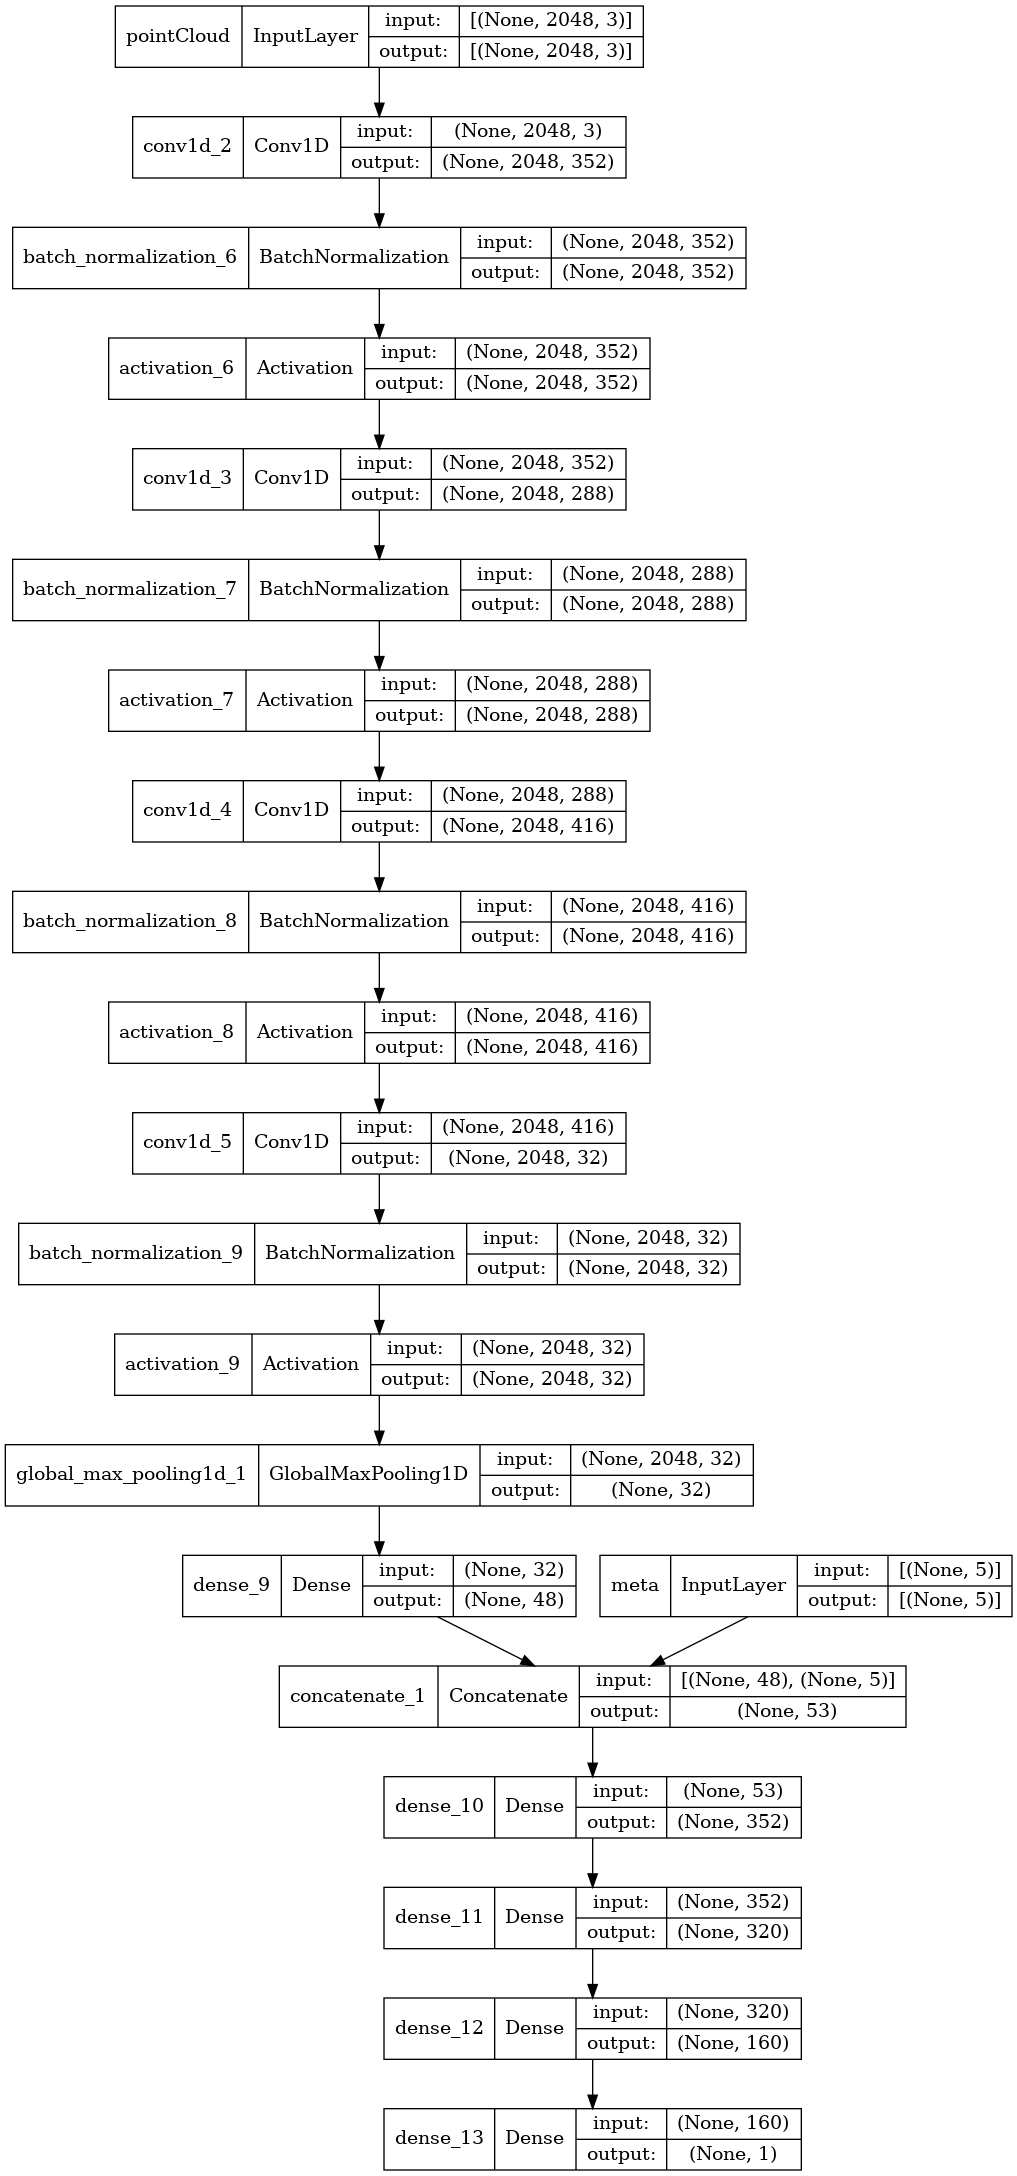

In [387]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

keras.utils.plot_model(model, show_shapes=True)


In [388]:
from tensorflow.keras.callbacks import EarlyStopping

estop =  EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)

best_history = model.fit(
   {'pointCloud':X_pc_fit, 'meta':X_meta_fit}, y_fit,
    epochs = 100,
    validation_data = ({'pointCloud':X_pc_test, 'meta':X_meta_test}, y_test),
    callbacks=[estop]
)

Epoch 1/100
30/30 [==============================] - 2s 42ms/step - loss: 0.7951 - mae: 0.6559 - val_loss: 0.3215 - val_mae: 0.4458
Epoch 2/100
30/30 [==============================] - 1s 33ms/step - loss: 0.3323 - mae: 0.4495 - val_loss: 0.5478 - val_mae: 0.5612
Epoch 3/100
30/30 [==============================] - 1s 33ms/step - loss: 0.2356 - mae: 0.3746 - val_loss: 0.4957 - val_mae: 0.5418
Epoch 4/100
30/30 [==============================] - 1s 33ms/step - loss: 0.2136 - mae: 0.3550 - val_loss: 0.5012 - val_mae: 0.5406
Epoch 5/100
30/30 [==============================] - 1s 35ms/step - loss: 0.1797 - mae: 0.3209 - val_loss: 0.4222 - val_mae: 0.4782
Epoch 6/100
30/30 [==============================] - 1s 34ms/step - loss: 0.1496 - mae: 0.2956 - val_loss: 0.3388 - val_mae: 0.4290
Epoch 7/100
30/30 [==============================] - 1s 33ms/step - loss: 0.1282 - mae: 0.2717 - val_loss: 0.4406 - val_mae: 0.5034
Epoch 8/100
30/30 [==============================] - 1s 33ms/step - loss: 0.

In [389]:
import pandas as pd

def plot_history(history:dict):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    # plt.ylim(0., 5.)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

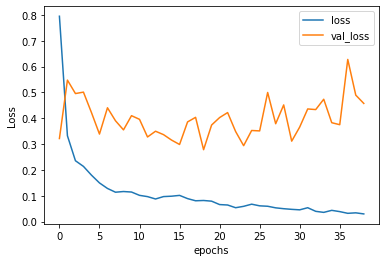

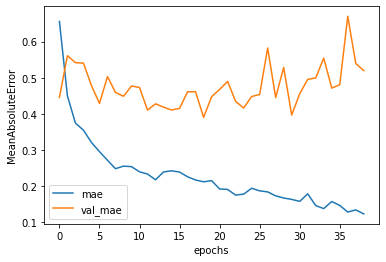

In [390]:
plot_history(best_history.history)

In [359]:
y_train_pred = model.predict({'pointCloud':X_pc_train, 'meta':X_meta_train})
y_val_pred = model.predict({'pointCloud':X_pc_val, 'meta':X_meta_val})
y_test_pred = model.predict({'pointCloud':X_pc_test, 'meta':X_meta_test})

In [360]:
print(y_train_pred.shape)
print(y_val_pred.shape)
print(y_test_pred.shape)

(705, 1)
(235, 1)
(112, 1)


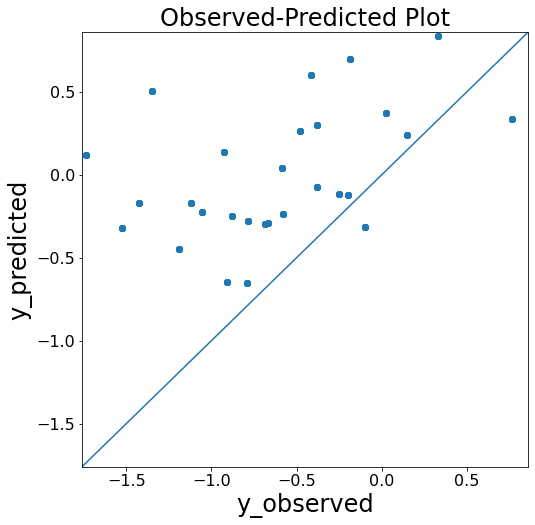

In [361]:
import numpy as np
from matplotlib import pyplot as plt

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

    return fig

fig = yyplot(y_test, y_test_pred)

In [100]:
import importlib
import show_mod
importlib.reload(show_mod)

<module 'show_mod' from '/home/i9-10920x/ML/modules/show_mod.py'>

In [ ]:
#訓練データの正解値
# train_target_2D = train_target.to_numpy()
# train_target_3D = train_target_2D.reshape(-1 , max_num_row, max_num_column)
show_mod.show_images(Y_train, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

In [ ]:
#訓練データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_train_pred, title_name=case_index_train, row=2, column=2, cmap=cmap, cbar=True)

In [ ]:
#検証データの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

In [ ]:
#検証データの予測値
# predict_2D = model.predict(test_data, verbose=0)
# predict_3D = predict_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_val_pred, title_name=case_index_val, row=3, column=3, cmap=cmap, cbar=True)

In [ ]:
#テストデータの正解値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)

In [ ]:
#テストデータの予測値
# test_target_2D = test_target.to_numpy()
# test_target_3D = test_target_2D.reshape(-1, max_num_row, max_num_column)
show_mod.show_images(Y_test_pred, title_name=case_index_test, row=2, column=2, cmap=cmap, cbar=True)